Doc de entrega: https://docs.google.com/document/d/1yLWJD7wDG03wI76xY3ruQAaz_G8BFORo1YOgecqjweo/edit?usp=sharing

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
from tqdm import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve, ShuffleSplit

# Setup

In [3]:
# Función óptima
def f(x):
    return np.exp(x)

In [4]:
# Tamaño de la muestra
N = 100

# Error irreducible
sigma_epsilon = 1

# Máximo de x
x_max = 2

# Punto para test
x_test = 1

# Vector de valores de x
x = x_max * (2 * np.random.rand(N) - 1)

# Ruido
epsilon = sigma_epsilon * np.random.randn(N)

# Función verdadera + ruido
y = f(x) + epsilon

# Punto 1 

En la sección de la Notebook “Predicciones para un x fijo” se utiliza un x_test elegido aleatoriamente en el intervalo [−x_max, x_max]. 

Fijar distintos valores de x_test, analizar la distribución de las predicciones en esos valores y relacionarlo con el modelo que se está entrenando
así como la forma del gráfico en ese punto.

In [5]:
# Punto para test
np.random.seed(42)

x_tests = x_max * (2 * np.random.rand(5) - 1)

In [6]:
x_tests

array([-0.50183952,  1.80285723,  0.92797577,  0.39463394, -1.37592544])

In [7]:
# R datasets
R = 10000

# max_depth de los árboles
depth_list = [1, None]

# Registramos las R predicciones en x_test
y_hat_test = np.zeros((len(depth_list), R))

resultados = dict()

# Iterar sobre x_tests
for x_test in x_tests:

    # Iteramos en los R datasets
    for r in tqdm(range(R)):
        # Tomamos una muestra de tamaño N
        x = x_max * (2 * np.random.rand(N) - 1) # Vector de valores de x
        epsilon = sigma_epsilon * np.random.randn(N) # Ruido

        y = f(x) + epsilon # Función verdadera + ruido

        # Calculamos la predicción para cada profundidad
        for k in range(len(depth_list)):
            # Construimos el árbol
            d = depth_list[k]
            tree = DecisionTreeRegressor(max_depth=d)

            # Entrenamos el árbol
            tree.fit(x.reshape(-1, 1), y)

            # Calculamos la predicción
            y_hat_test[k, r] = tree.predict(np.array([[x_test]])).item()
            
            resultados[x_test] = {"x_test": x_test,
                            "y_hat_test": y_hat_test.copy()  # .copy() para evitar referencias
                        }

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:14<00:00, 682.71it/s]


In [8]:
resultados

{np.float64(-0.50183952461055): {'x_test': np.float64(-0.50183952461055),
  'y_hat_test': array([[ 0.72412377,  0.93341368,  1.18033152, ...,  0.73017259,
           0.87637927,  0.76086503],
         [-2.06924469,  1.15504401,  0.80635117, ...,  1.52058803,
           0.57638543,  0.22693735]], shape=(2, 10000))},
 np.float64(1.8028572256396647): {'x_test': np.float64(1.8028572256396647),
  'y_hat_test': array([[5.52159291, 3.3544796 , 4.60972561, ..., 4.73895555, 4.66172282,
          3.81164755],
         [6.70824632, 6.57041842, 4.8073111 , ..., 4.8879612 , 5.95467243,
          7.09171608]], shape=(2, 10000))},
 np.float64(0.9279757672456204): {'x_test': np.float64(0.9279757672456204),
  'y_hat_test': array([[1.12950974, 4.7323426 , 1.02413768, ..., 0.81610817, 0.86943311,
          4.36839878],
         [1.73165747, 4.74470599, 2.22229672, ..., 2.60777686, 1.13011749,
          3.57932442]], shape=(2, 10000))},
 np.float64(0.3946339367881464): {'x_test': np.float64(0.394633936788

In [9]:
for key, value in resultados.items():
    print(f"Clave: {key}")
    for subkey, subvalue in value.items():
        # Si el valor es un array de numpy, mostramos su shape
        if hasattr(subvalue, 'shape'):
            print(f"  {subkey}: shape = {subvalue.shape}")
        else:
            print(f"  {subkey}: type = {type(subvalue)}")

Clave: -0.50183952461055
  x_test: shape = ()
  y_hat_test: shape = (2, 10000)
Clave: 1.8028572256396647
  x_test: shape = ()
  y_hat_test: shape = (2, 10000)
Clave: 0.9279757672456204
  x_test: shape = ()
  y_hat_test: shape = (2, 10000)
Clave: 0.3946339367881464
  x_test: shape = ()
  y_hat_test: shape = (2, 10000)
Clave: -1.375925438230254
  x_test: shape = ()
  y_hat_test: shape = (2, 10000)


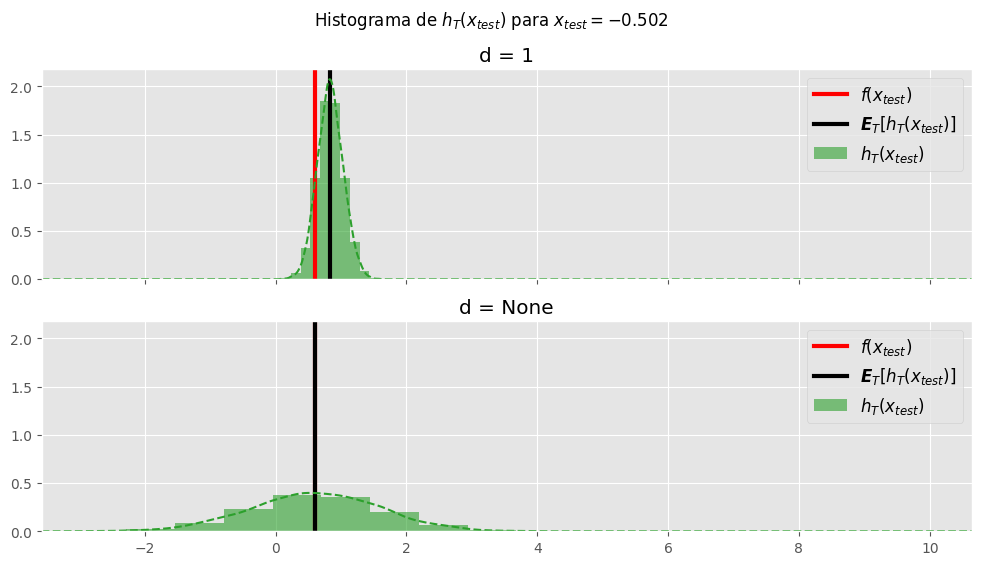

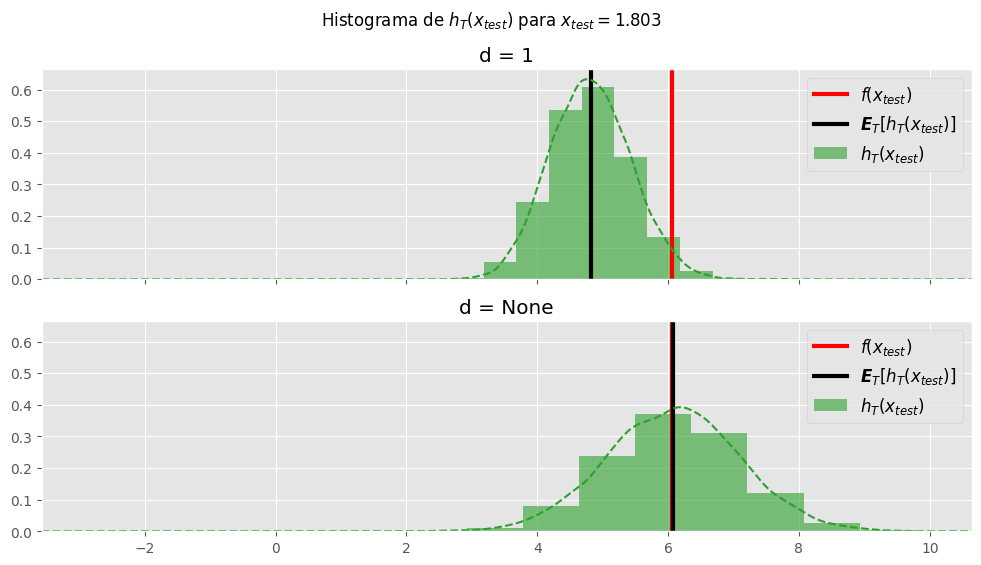

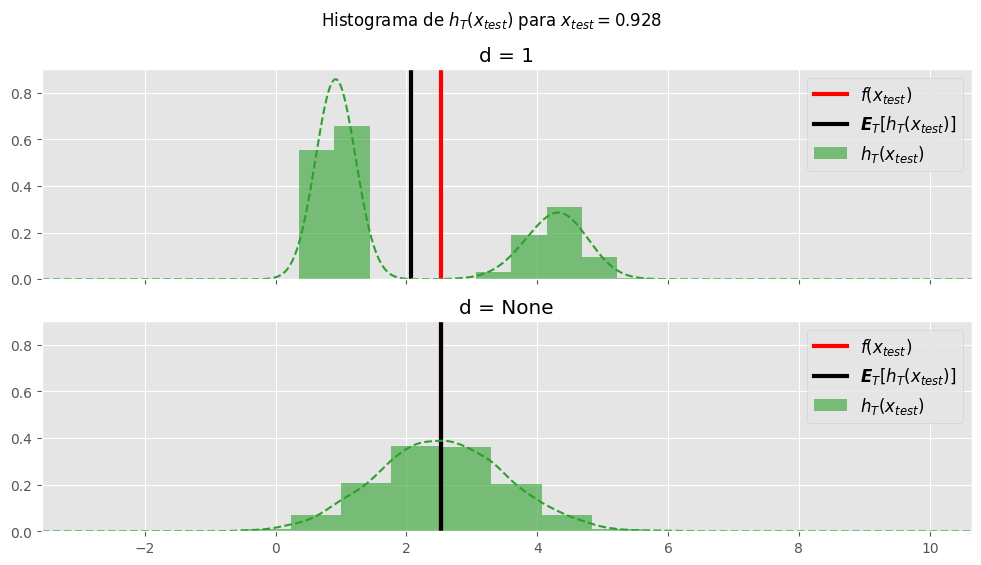

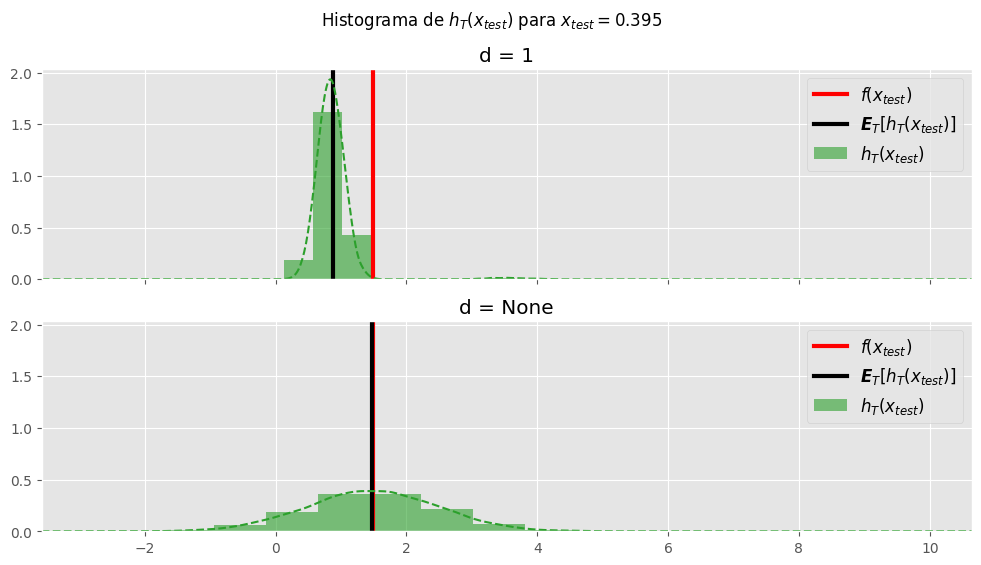

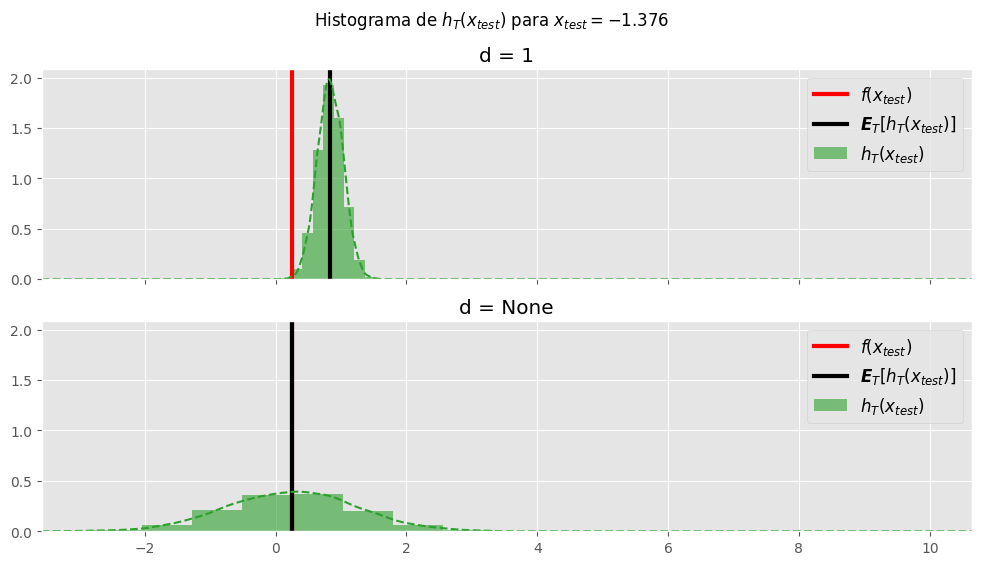

In [10]:
# 1. Calcular los límites globales del eje x
y_min = float('inf')
y_max = float('-inf')

predicciones = pd.DataFrame()

for value in resultados.values():
    y_hat_test = value["y_hat_test"]
    y_min = min(y_min, y_hat_test.min())
    y_max = max(y_max, y_hat_test.max())

# 2. Graficar usando los mismos límites de eje x
for key, value in resultados.items():
    x_test = value["x_test"]
    y_hat_test = value["y_hat_test"]

    y_hat_test_mean = np.mean(y_hat_test, 1)

    
    fig, axs = plt.subplots(len(depth_list), 1, sharex=True, sharey=True, figsize=(12,6))

    for k in range(len(depth_list)):
        axs[k].hist(y_hat_test[k], density=True, color='tab:green', alpha=0.6)
        axs[k].set_xlim(y_min, y_max)  # Fijar los mismos límites en todos los plots
        axs[k].axvline(x=f(x_test), color='r', linewidth=3.0)
        axs[k].axvline(x=y_hat_test_mean[k], color='k', linewidth=3.0)
        axs[k].title.set_text('d = {}'.format(depth_list[k]))
        axs[k].legend([r'$f(x_{test})$', r'$\boldsymbol{E}_T[h_T(x_{test})]$', r'$h_T(x_{test})$'], fontsize=12)
        
        datos = pd.DataFrame()
        
        datos['x_test'] = x_test
        datos['y_hat_test'] = y_hat_test[k]
        datos['y_hat_test_mean'] = y_hat_test_mean[k]
        datos['f_test'] = f(x_test)
        
        predicciones = pd.concat([predicciones, datos])

    for k in range(len(depth_list)):
        x_range = np.linspace(y_min, y_max, 1000)
        kde = stats.gaussian_kde(y_hat_test[k])
        axs[k].plot(x_range, kde(x_range), color='tab:green', ls='--')

    plt.suptitle(rf'Histograma de $h_T(x_{{test}})$ para $x_{{test}}={x_test:.3f}$', size=12)
    plt.show()

Para valores de x_test cercanos a -x_max, tenemos reducción en varianza y de sesgo, mientras que valores de x_test cercanos a x_max tenemos mayor varianza con aumento de sesgo. 

# Punto 2

En la sección de la Notebook “Predicciones para un x fijo”, analizar qué ocurre si se aumenta
el tamaño del conjunto de datos N.

100%|██████████| 10000/10000 [00:14<00:00, 669.73it/s]


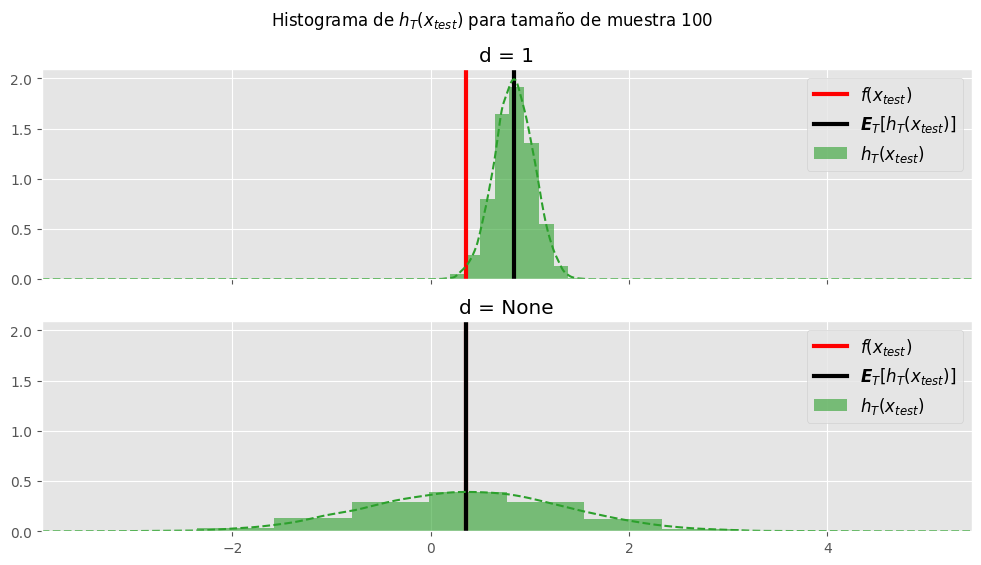

100%|██████████| 10000/10000 [00:33<00:00, 297.09it/s]


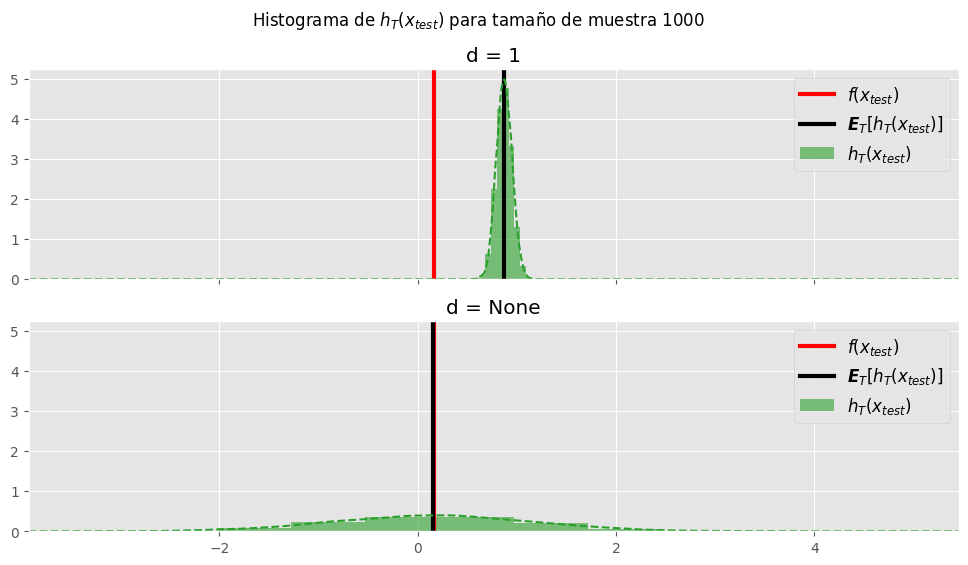

100%|██████████| 10000/10000 [02:26<00:00, 68.44it/s]


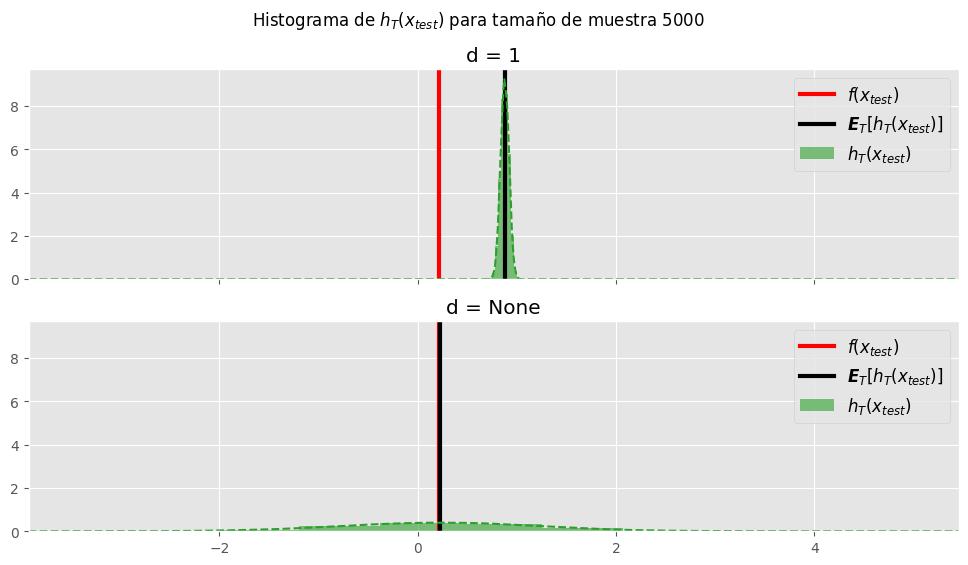

In [13]:
# Tamaño de la muestra
N = list([100, 1000, 5000])

# Definir límites globales para el eje x
global_xlim = None

for n in N:
    # Vector de valores de x
    x = x_max * (2 * np.random.rand(n) - 1)

    # Ruido
    epsilon = sigma_epsilon * np.random.randn(n)

    # Función verdadera + ruido
    y = f(x) + epsilon

    # Punto para test
    x_test = x_max * (2 * np.random.rand() - 1)

    # max_depth de los árboles
    depth_list = [1, None]

    # Registramos las R predicciones en x_test
    y_hat_test = np.zeros((len(depth_list), R))

    # Iteramos en los R datasets
    for r in tqdm(range(R)):
        # Tomamos una muestra de tamaño N
        x = x_max * (2 * np.random.rand(n) - 1) # Vector de valores de x
        epsilon = sigma_epsilon * np.random.randn(n) # Ruido
        y = f(x) + epsilon # Función verdadera + ruido

        # Calculamos la predicción para cada profundidad
        for k in range(len(depth_list)):
            # Construimos el árbol
            d = depth_list[k]
            tree = DecisionTreeRegressor(max_depth=d)

            # Entrenamos el árbol
            tree.fit(x.reshape(-1, 1), y)

            # Calculamos la predicción
            y_hat_test[k, r] = tree.predict(np.array([[x_test]])).item()

    # Graficamos los resultados en un histograma

    # Calculamos la predicción promedio y su desvío
    y_hat_test_mean = np.mean(y_hat_test, 1)

    fig, axs = plt.subplots(len(depth_list), 1, sharex=True, sharey=True, figsize=(12,6))

    # Actualizar límites globales si es necesario
    if global_xlim is None:
        min_x = min(y_hat_test.min(), f(x_test))
        max_x = max(y_hat_test.max(), f(x_test))
        global_xlim = (min_x - 0.1 * (max_x - min_x), max_x + 0.1 * (max_x - min_x))

    for k in range(len(depth_list)):
        axs[k].hist(y_hat_test[k], density=True, color='tab:green', alpha=0.6)
        axs[k].set_xlim(global_xlim)
        axs[k].axvline(x=f(x_test), color='r', linewidth=3.0)
        axs[k].axvline(x=y_hat_test_mean[k], color='k', linewidth=3.0)
        axs[k].title.set_text('d = {}'.format(depth_list[k]))
        axs[k].legend([r'$f(x_{test})$', r'$\boldsymbol{E}_T[h_T(x_{test})]$', r'$h_T(x_{test})$'], fontsize=12)

    for k in range(len(depth_list)):
        x_range = np.linspace(global_xlim[0], global_xlim[1], 1000)
        kde = stats.gaussian_kde(y_hat_test[k])
        axs[k].plot(x_range, kde(x_range), color='tab:green', ls='--')

    # plt.title(f'Tamaño muestra {n}')
    plt.suptitle(rf'Histograma de $h_T(x_{{test}})$ para tamaño de muestra {n}', size=12)
    plt.show()

A medida que aumento el tamaño de la muestra, vemos que para árboles de profundidad 1 nuestro sesgo aumenta, lo cual puede darse porque tenemos un modelo demasiado "simple" (profundidad 1). A medida que tenemos mayor cantidad de datos, deberíamos aumentar la profundad de nuestro árbol para no tener aumento de sesgo. 

# Punto 3

En la sección de la Notebook “Predicciones para un x fijo”, analizar qué ocurre al variar el error irreducible.

100%|██████████| 10000/10000 [00:15<00:00, 658.04it/s]


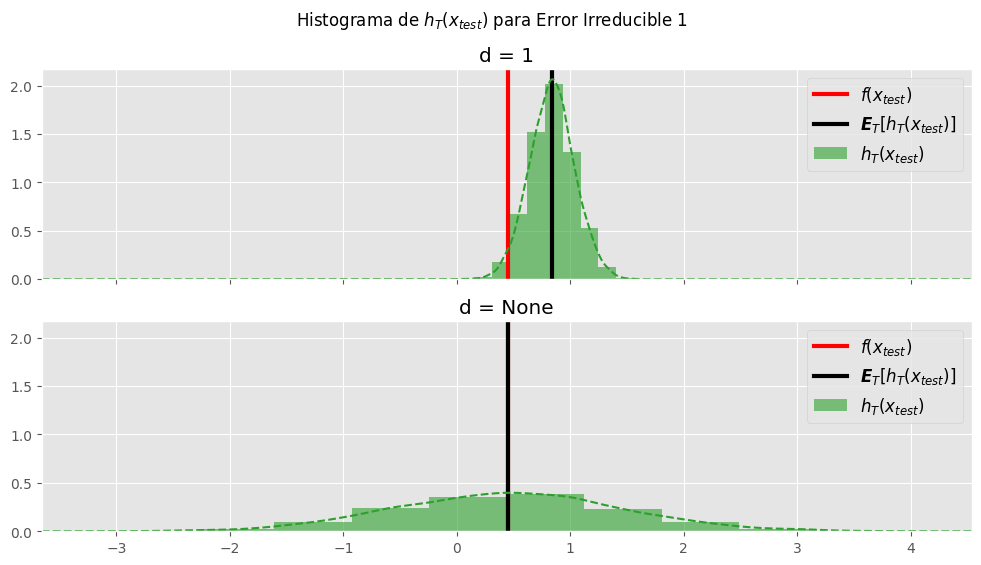

100%|██████████| 10000/10000 [00:14<00:00, 674.09it/s]


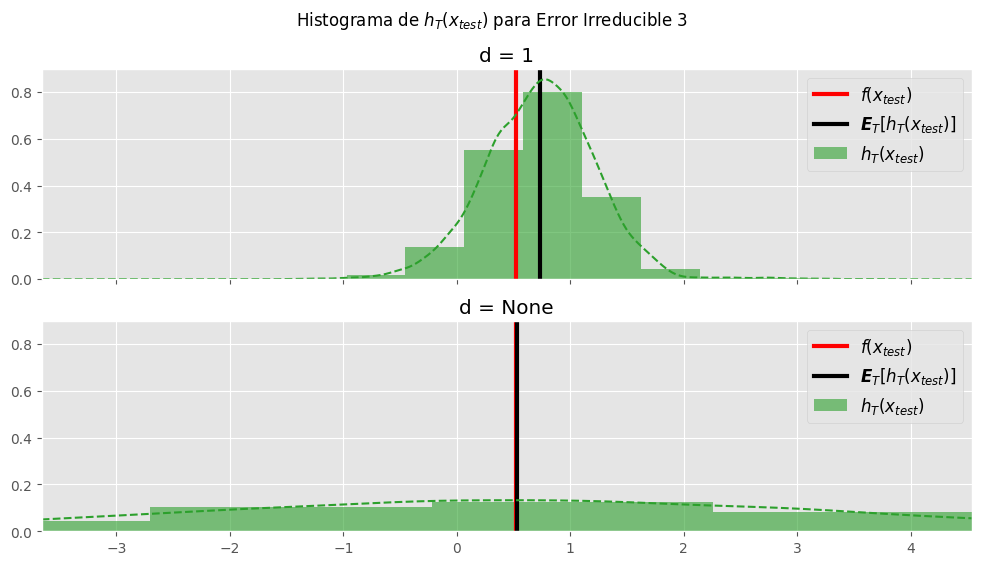

100%|██████████| 10000/10000 [00:14<00:00, 676.62it/s]


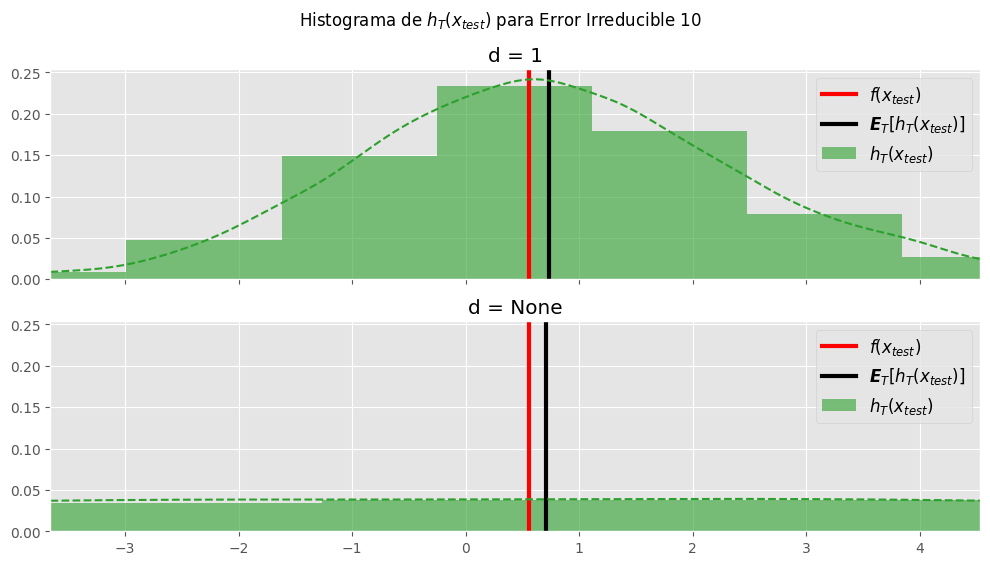

In [14]:
# Tamaño de la muestra
N = 100

# Error irreducible
sigma_epsilon = list([1, 3, 10])

# Definir límites globales para el eje x
global_xlim = None

for s_e in sigma_epsilon:
    # Vector de valores de x
    x = x_max * (2 * np.random.rand(N) - 1)

    # Ruido
    epsilon = s_e * np.random.randn(N)

    # Función verdadera + ruido
    y = f(x) + epsilon

    # Punto para test
    x_test = x_max * (2 * np.random.rand() - 1)

    # max_depth de los árboles
    depth_list = [1, None]

    # Registramos las R predicciones en x_test
    y_hat_test = np.zeros((len(depth_list), R))

    # Iteramos en los R datasets
    for r in tqdm(range(R)):
        # Tomamos una muestra de tamaño N
        x = x_max * (2 * np.random.rand(N) - 1) # Vector de valores de x
        epsilon = s_e * np.random.randn(N) # Ruido
        y = f(x) + epsilon # Función verdadera + ruido

        # Calculamos la predicción para cada profundidad
        for k in range(len(depth_list)):
            # Construimos el árbol
            d = depth_list[k]
            tree = DecisionTreeRegressor(max_depth=d)

            # Entrenamos el árbol
            tree.fit(x.reshape(-1, 1), y)

            # Calculamos la predicción
            y_hat_test[k, r] = tree.predict(np.array([[x_test]])).item()

    # Graficamos los resultados en un histograma

    # Calculamos la predicción promedio y su desvío
    y_hat_test_mean = np.mean(y_hat_test, 1)

    fig, axs = plt.subplots(len(depth_list), 1, sharex=True, sharey=True, figsize=(12,6))

    # Actualizar límites globales si es necesario
    if global_xlim is None:
        min_x = min(y_hat_test.min(), f(x_test))
        max_x = max(y_hat_test.max(), f(x_test))
        global_xlim = (min_x - 0.1 * (max_x - min_x), max_x + 0.1 * (max_x - min_x))

    for k in range(len(depth_list)):
        axs[k].hist(y_hat_test[k], density=True, color='tab:green', alpha=0.6)
        axs[k].set_xlim(global_xlim)
        axs[k].axvline(x=f(x_test), color='r', linewidth=3.0)
        axs[k].axvline(x=y_hat_test_mean[k], color='k', linewidth=3.0)
        axs[k].title.set_text('d = {}'.format(depth_list[k]))
        axs[k].legend([r'$f(x_{test})$', r'$\boldsymbol{E}_T[h_T(x_{test})]$', r'$h_T(x_{test})$'], fontsize=12)

    for k in range(len(depth_list)):
        x_range = np.linspace(global_xlim[0], global_xlim[1], 1000)
        kde = stats.gaussian_kde(y_hat_test[k])
        axs[k].plot(x_range, kde(x_range), color='tab:green', ls='--')

    plt.suptitle(rf'Histograma de $h_T(x_{{test}})$ para Error Irreducible {s_e}', size=12)
    plt.show()

A mayor error ireduccible vemos un aumento en varianza. 

# Punto 4

En la sección de la Notebook “Descomposición del error promediando en x”, analizar la
forma de las curvas de sesgo y varianza cambiado la fórmula de la función f(x).

In [76]:
def error_desc():

    # Tamaño de la muestra
    N = 100

    # Error irreducible
    sigma_epsilon = 1

    # Máximo de x
    x_max = 2

    # Punto para test
    x_test = 1

    # Vector de valores de x
    x = x_max * (2 * np.random.rand(N) - 1)

    # Ruido
    epsilon = sigma_epsilon * np.random.randn(N)

    # Función verdadera + ruido
    y = f(x) + epsilon


    # R datasets
    R = 10000

    x_test = np.linspace(-x_max, x_max, 1000)

    # max_depth de los árboles
    depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]

    # Registramos las y en train
    y_train = np.zeros((N, R))

    # Registramos las y en test
    y_test = np.zeros((len(x_test), R))

    # Registramos las predicciones en train
    y_hat_train = np.zeros((len(depth_list), N, R))

    # Registramos las predicciones en test
    y_hat_test = np.zeros((len(depth_list), len(x_test), R))

    # Iteramos en los R datasets
    for r in tqdm(range(R)):
        # Tomamos una muestra de tamaño N
        x = x_max * (2 * np.random.rand(N) - 1) # Vector de valores de x
        epsilon = sigma_epsilon * np.random.randn(N) # Ruido
        y = f(x) + epsilon # Función verdadera + ruido
        y_train[:,r] = y

        # Simulamos las etiquetas en x_test
        epsilon_test = sigma_epsilon * np.random.randn(len(x_test)) # Ruido
        y_test[:,r] = f(x_test) + epsilon_test # Función verdadera + ruido

        # Calculamos la predicción para cada profundidad
        for k in range(len(depth_list)):
            # Construimos el árbol
            d = depth_list[k]
            tree = DecisionTreeRegressor(max_depth=d)

            # Entrenamos el árbol
            tree.fit(x.reshape(-1, 1), y)

            # Predicción en train
            y_hat_train_k_r = tree.predict(x.reshape(-1,1))
            y_hat_train[k,:,r] = y_hat_train_k_r

            # Calculamos la predicción en test
            y_hat_test_k_r = tree.predict(x_test.reshape(-1,1))
            y_hat_test[k,:,r] = y_hat_test_k_r
            
    # Calculamos error, sesgo y varianza
    avg_train_squared_error = np.mean(np.square(y_hat_train-y_train),axis=(1,2))
    avg_test_squared_error = np.mean(np.square(y_hat_test-y_test),axis=(1,2))
    avg_bias_squared = np.mean(np.square(f(x_test)-np.mean(y_hat_test,axis=2)),axis=1)
    avg_variance = np.mean(np.var(y_hat_test,axis=2),axis=1)

    # Graficamos los resultados
    d_arr = range(len(depth_list))
    xticks_labels = [str(d) for d in depth_list]
    plt.figure(figsize=(8, 5))
    plt.plot(avg_test_squared_error, 'g', linewidth=3.0)
    plt.plot(avg_train_squared_error, 'k', linewidth=3.0)
    plt.plot(avg_bias_squared, 'y--')
    plt.plot(avg_variance, 'b--')
    plt.plot(avg_variance + avg_bias_squared + (sigma_epsilon ** 2) * np.ones_like(d_arr), 'o--', c='orange')
    plt.plot((sigma_epsilon ** 2) * np.ones_like(d_arr), 'r--')
    plt.xticks(d_arr, xticks_labels)
    plt.title(f'Descomposición de f(x) = {func}')
    plt.ylabel('Error', size=12)
    plt.xlabel('d', size=12)
    plt.legend(['test error', 'training error', r'bias squared: $B=(\boldsymbol{E}_T[h_T(x)] - f(x))^2$',
                r'$V=\boldsymbol{Var}_T(h_T(x))$', 'B+V+N',r'irreducible error: $N=\sigma_\epsilon^2$'], loc='upper center', fontsize=12)
    plt.show()

## f(x) = 2x^2 + 4cos^2(x)

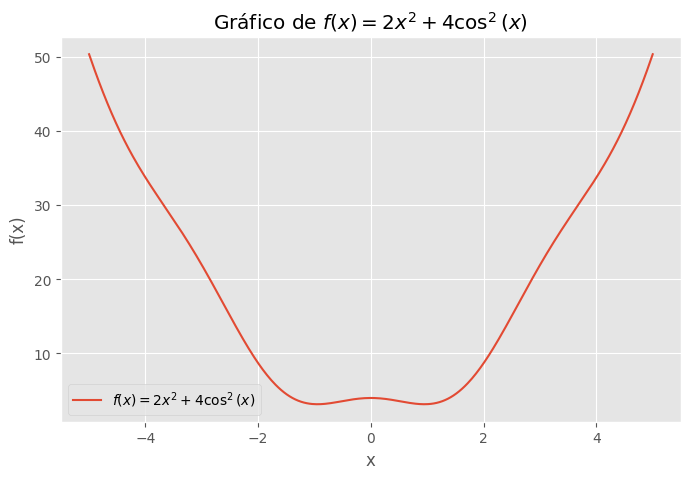

In [ ]:
# Definir la función
def f(x):
    return 2 * x**2 + 4 * np.cos(x)**2


func = '2x^2 + 4\cos^2(x)$'
# Crear un rango de valores para x
x = np.linspace(-5, 5, 400)
y = f(x)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'$f(x) = 2x^2 + 4\cos^2(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Gráfico de $f(x) = {func}')
plt.legend()
plt.grid(True)
plt.show()

100%|██████████| 10000/10000 [00:35<00:00, 283.97it/s]


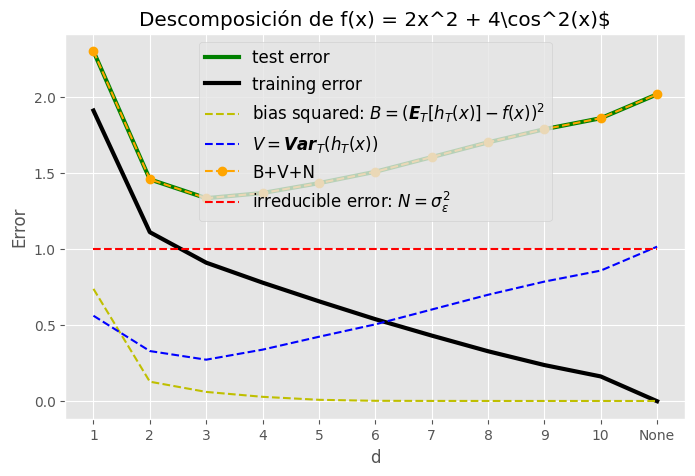

In [80]:
error_desc()

## f(x) = 2x^2+3x+10

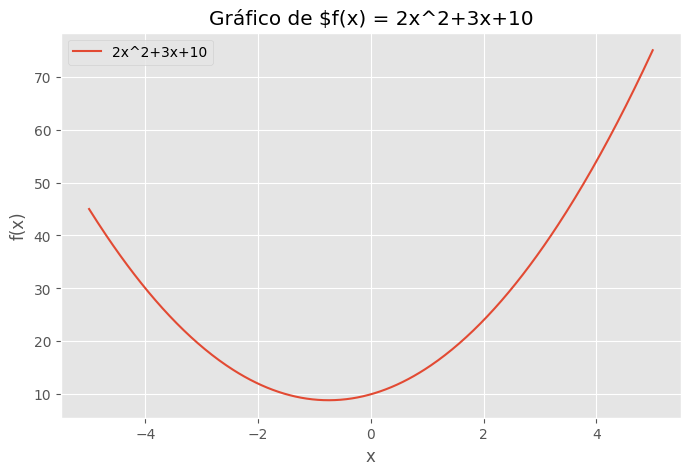

In [85]:
# Definir la función
def f(x):
    return 2 * x**2 + 3*x + 10


func = '2x^2+3x+10'
# Crear un rango de valores para x
x = np.linspace(-5, 5, 400)
y = f(x)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f'{func}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Gráfico de $f(x) = {func}')
plt.legend()
plt.grid(True)
plt.show()

100%|██████████| 10000/10000 [00:35<00:00, 278.90it/s]


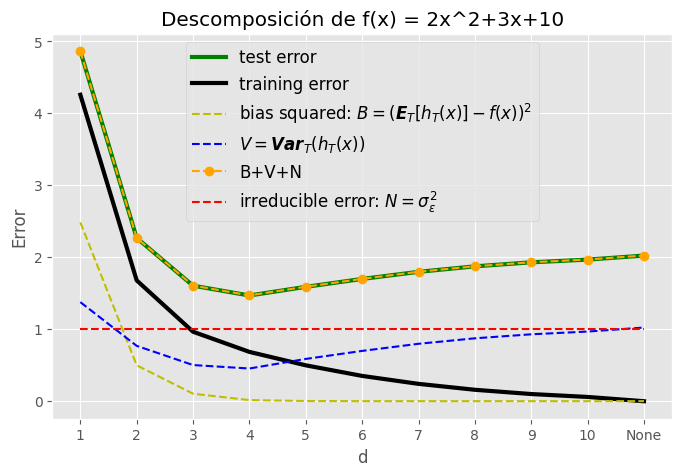

In [86]:
error_desc()

## f(x)=0.1x^3−x^2+2x−5

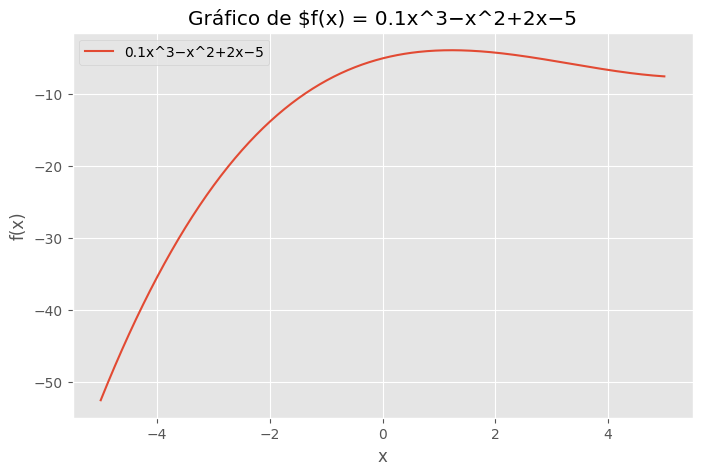

In [87]:
# Definir la función
def f(x):
    return 0.1 * x**3 - x**2 + 2*x - 5


func = '0.1x^3−x^2+2x−5'
# Crear un rango de valores para x
x = np.linspace(-5, 5, 400)
y = f(x)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f'{func}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Gráfico de $f(x) = {func}')
plt.legend()
plt.grid(True)
plt.show()

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:34<00:00, 287.87it/s]


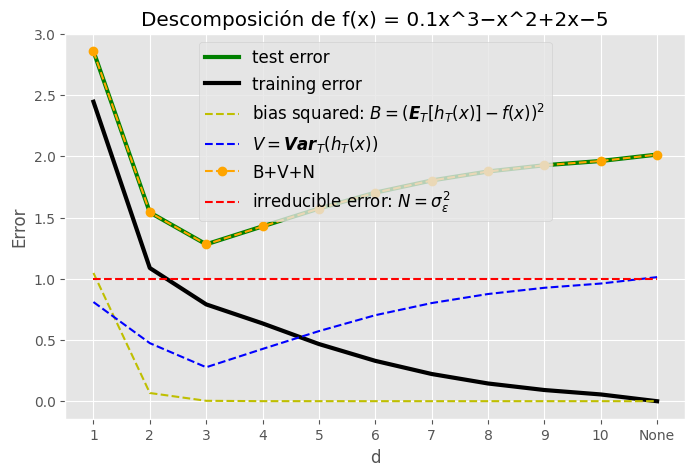

In [89]:
error_desc()

Siempre que llego al minimo test_error es mi mejor modelo? Porque vemos que la varianza baja lo suficiente y el sesgo también, ya complejizando  un paso más el test_error sube y la varianza también.

# Punto 5

Realizar el mismo análisis que en el punto anterior para la sección “Sesgo y Varianza:
visualización para todo x en simultáneo”.

In [93]:
def sesgo_varianza():
    # R datasets
    R = 10000

    x_range = np.linspace(-x_max, x_max, 1000)

    # max_depth de los árboles
    depth_list = [1, None]

    # Graficamos
    fig, axs = plt.subplots(len(depth_list), 1, sharex=True, sharey=True, figsize=(8,8))

    for k in range(len(depth_list)):
        # Iteramos en los R datasets
        y_hat_range = np.zeros((R,len(x_range)))
        for r in range(R):
            # Tomamos una muestra de tamaño N
            x = x_max * (2 * np.random.rand(N) - 1) # Vector de valores de x
            epsilon = sigma_epsilon * np.random.randn(N) # Ruido
            y = f(x) + epsilon # Función verdadera + ruido

            # Construimos el árbol
            d = depth_list[k]
            tree = DecisionTreeRegressor(max_depth=d)

            # Entrenamos el árbol
            tree.fit(x.reshape(-1, 1), y)

            # Predicción en train
            y_hat_range[r,:] = tree.predict(x_range.reshape(-1,1))

        # Graficamos la función verdadera
        y_hat_range_mean = np.mean(y_hat_range,axis=0)
        y_hat_range_std = np.std(y_hat_range,axis=0)
        axs[k].plot(x_range, f(x_range), 'b', linewidth=3.0)
        axs[k].step(x_range, y_hat_range_mean, 'g', linewidth=3.0)
        axs[k].fill_between(
            x_range,
            y_hat_range_mean - y_hat_range_std,
            y_hat_range_mean + y_hat_range_std,
            alpha=0.2,
            color="tab:green",
            lw=2,
        )
        axs[k].legend([r'$f(x)$',r'$\boldsymbol{E}_T(h_T(x))$',r'$Var_{T}(h_T(x))$'])

        axs[k].grid(True)
        axs[k].title.set_text('depth = {}'.format(depth_list[k]))

    plt.xlabel('x')
    plt.ylabel('y')
    plt.suptitle(f'Sesgo y Varianza - {func}')
    plt.tight_layout()
    plt.show()

In [91]:
# Función óptima
def f(x):
    return np.exp(x)

func = ''

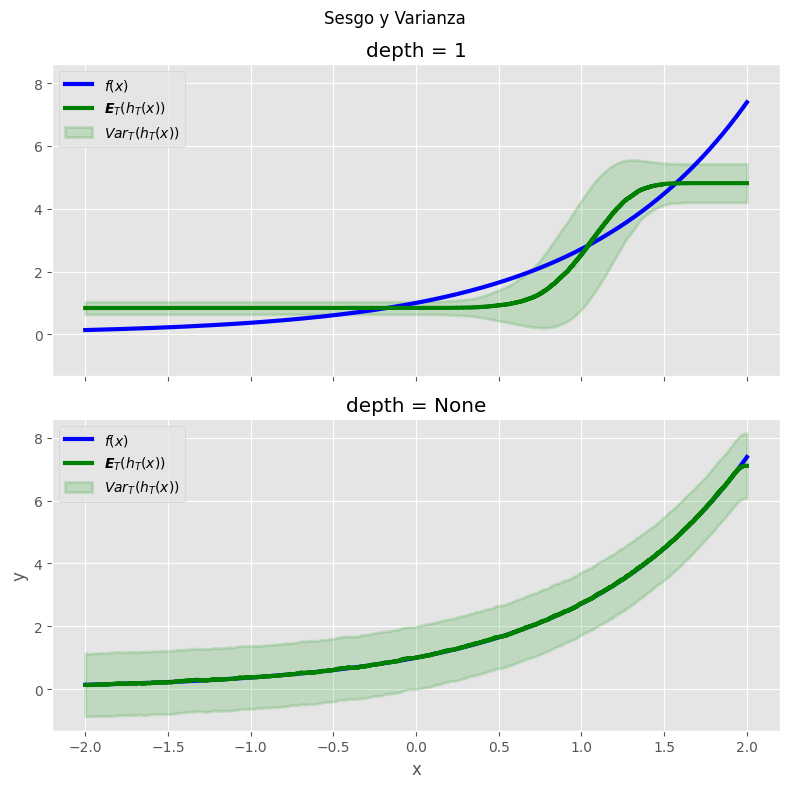

In [92]:
sesgo_varianza()

## f(x) = 2x^2 + 4\cos^2(x)

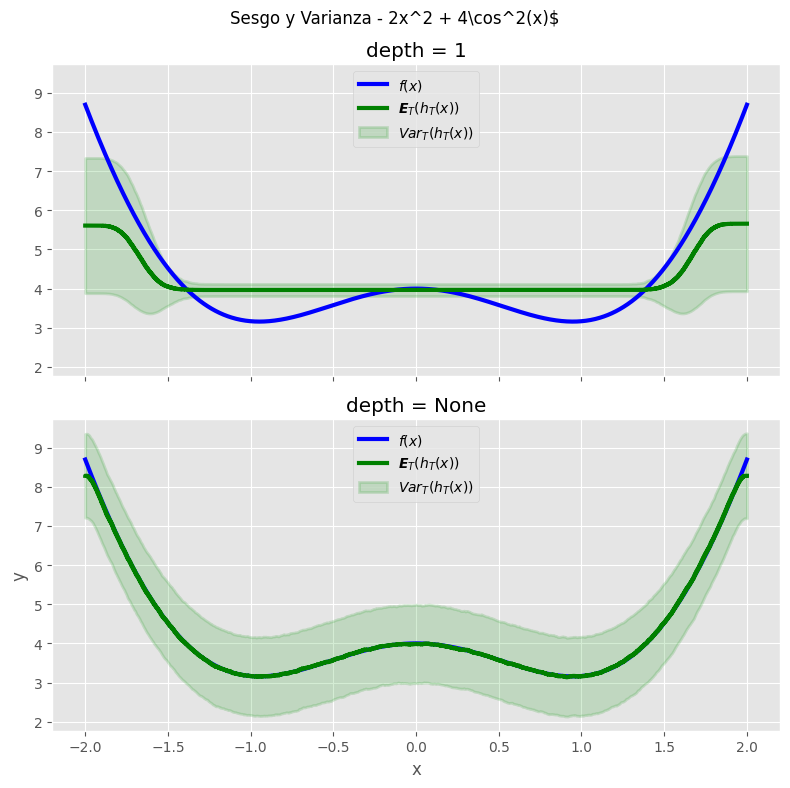

In [97]:
# Definir la función
def f(x):
    return 2 * x**2 + 4 * np.cos(x)**2


func = '2x^2 + 4\cos^2(x)$'
sesgo_varianza()

## f(x) = 2x^2+3x+10

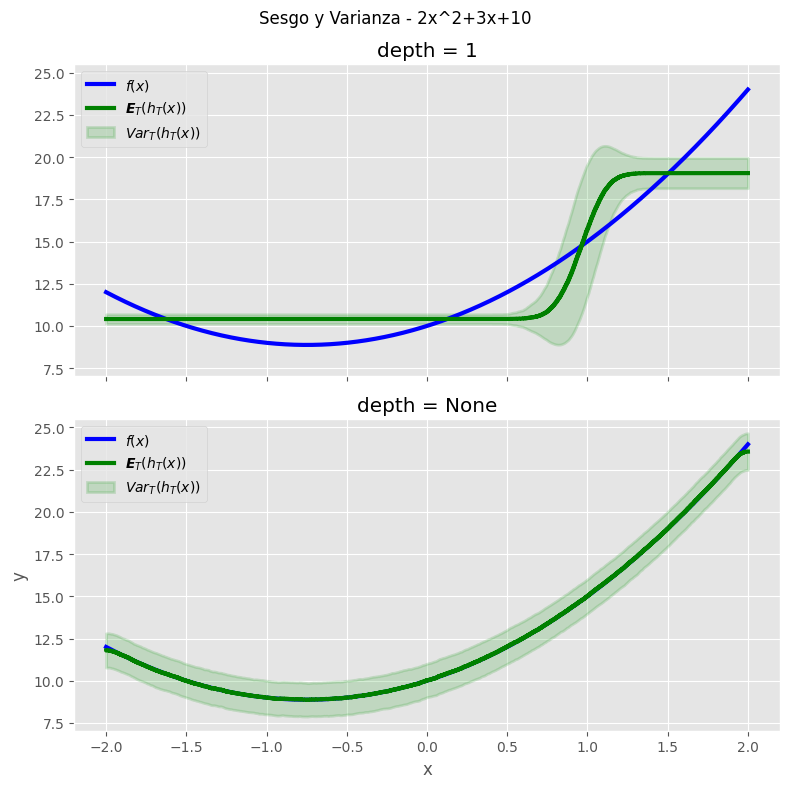

In [94]:
# Definir la función
def f(x):
    return 2 * x**2 + 3*x + 10


func = '2x^2+3x+10'
sesgo_varianza()

## f(x) = func = 0.1x^3−x^2+2x−5

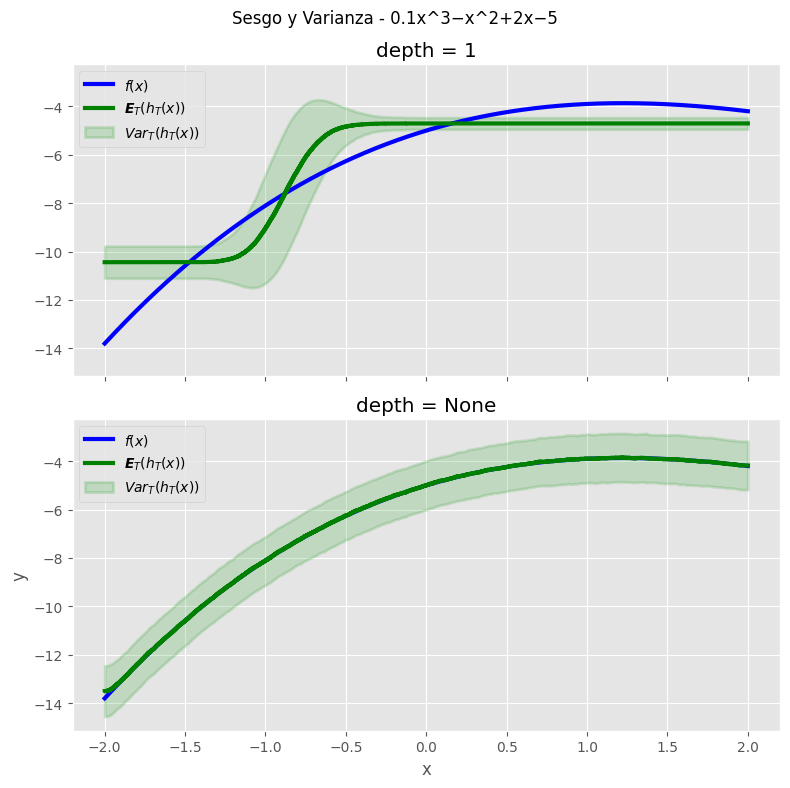

In [96]:
# Definir la función
def f(x):
    return 0.1 * x**3 - x**2 + 2*x - 5


func = '0.1x^3−x^2+2x−5'
sesgo_varianza()

# Punto 6

Relacionar los cálculos de Sesgo y Varianza hechos en la sección “Descomposición del error promediando en x” con las curvas de aprendizaje hechas en la sección “Learning Curve”.

# Punto 7

Por último, analizar qué ocurre con las curvas de error calculadas en la sección “Descomposición del error promediando en x” al aumentar el tamaño N de los datasets.

In [98]:
# Función óptima
def f(x):
    return np.exp(x)

In [99]:
def desc_error_N(N): 

    # R datasets
    R = 10000

    x_test = np.linspace(-x_max, x_max, 1000)

    # max_depth de los árboles
    depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]

    # Registramos las y en train
    y_train = np.zeros((N, R))

    # Registramos las y en test
    y_test = np.zeros((len(x_test), R))

    # Registramos las predicciones en train
    y_hat_train = np.zeros((len(depth_list), N, R))

    # Registramos las predicciones en test
    y_hat_test = np.zeros((len(depth_list), len(x_test), R))

    # Iteramos en los R datasets
    for r in tqdm(range(R)):
        # Tomamos una muestra de tamaño N
        x = x_max * (2 * np.random.rand(N) - 1) # Vector de valores de x
        epsilon = sigma_epsilon * np.random.randn(N) # Ruido
        y = f(x) + epsilon # Función verdadera + ruido
        y_train[:,r] = y

        # Simulamos las etiquetas en x_test
        epsilon_test = sigma_epsilon * np.random.randn(len(x_test)) # Ruido
        y_test[:,r] = f(x_test) + epsilon_test # Función verdadera + ruido

        # Calculamos la predicción para cada profundidad
        for k in range(len(depth_list)):
            # Construimos el árbol
            d = depth_list[k]
            tree = DecisionTreeRegressor(max_depth=d)

            # Entrenamos el árbol
            tree.fit(x.reshape(-1, 1), y)

            # Predicción en train
            y_hat_train_k_r = tree.predict(x.reshape(-1,1))
            y_hat_train[k,:,r] = y_hat_train_k_r

            # Calculamos la predicción en test
            y_hat_test_k_r = tree.predict(x_test.reshape(-1,1))
            y_hat_test[k,:,r] = y_hat_test_k_r
            
    # Calculamos error, sesgo y varianza
    avg_train_squared_error = np.mean(np.square(y_hat_train-y_train),axis=(1,2))
    avg_test_squared_error = np.mean(np.square(y_hat_test-y_test),axis=(1,2))
    avg_bias_squared = np.mean(np.square(f(x_test)-np.mean(y_hat_test,axis=2)),axis=1)
    avg_variance = np.mean(np.var(y_hat_test,axis=2),axis=1)

    # Graficamos los resultados
    d_arr = range(len(depth_list))
    xticks_labels = [str(d) for d in depth_list]
    plt.figure(figsize=(8, 5))
    plt.plot(avg_test_squared_error, 'g', linewidth=3.0)
    plt.plot(avg_train_squared_error, 'k', linewidth=3.0)
    plt.plot(avg_bias_squared, 'y--')
    plt.plot(avg_variance, 'b--')
    plt.plot(avg_variance + avg_bias_squared + (sigma_epsilon ** 2) * np.ones_like(d_arr), 'o--', c='orange')
    plt.plot((sigma_epsilon ** 2) * np.ones_like(d_arr), 'r--')
    plt.xticks(d_arr, xticks_labels)
    plt.title(f'Descomposición error - N = {N}')
    plt.ylabel('Error', size=12)
    plt.xlabel('d', size=12)
    plt.legend(['test error', 'training error', r'bias squared: $B=(\boldsymbol{E}_T[h_T(x)] - f(x))^2$',
                r'$V=\boldsymbol{Var}_T(h_T(x))$', 'B+V+N',r'irreducible error: $N=\sigma_\epsilon^2$'], loc='upper center', fontsize=12)
    plt.show()

100%|██████████| 10000/10000 [01:08<00:00, 145.51it/s]


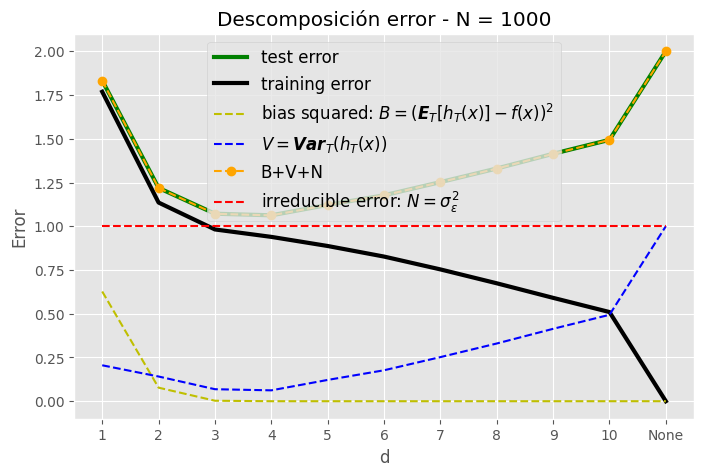

In [100]:
desc_error_N(1000)

100%|██████████| 10000/10000 [04:55<00:00, 33.79it/s]


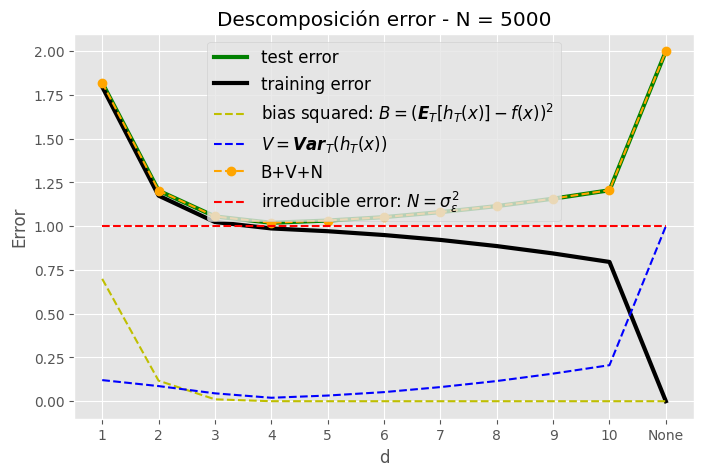

In [102]:
desc_error_N(5000)

A medida que aumentamos la muestra de entrenamiento vemos que las curvas de "trainning error" y "test error" se acercan para modelos de poca profundidad (entre profundidad 1 y 3). Esto puede darse ya que contamos con más datos en el entrenamiento, y que tener más observaciones haga que nuestro modelo reduzca error entre training y test. También al tener más datos se pueden utilizar modelos más complejos sin llegar al overfitting tan rápido.

Por otra parte, al tener más observaciones vemos que la curva de varianza se aplana, esto puede deberse a que el modelo estima mejor observaciones de X y que reduzca el valor final de varianza para cada profundidad. 